In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import pretty inbuilt print
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [4]:
from src.prep import Prep
prep = Prep()
X = prep.prep_car


OPTICS - car.csv

In [5]:
optics = OPTICS(min_samples=20, max_eps=1.5, metric='euclidean', cluster_method='xi', xi=0.05)
optics_labels = optics.fit_predict(X)


d:\ds5230-group2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\ds5230-group2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\error\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\error\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\error\AppData\Local\Programs\Python\Python312\Lib\s

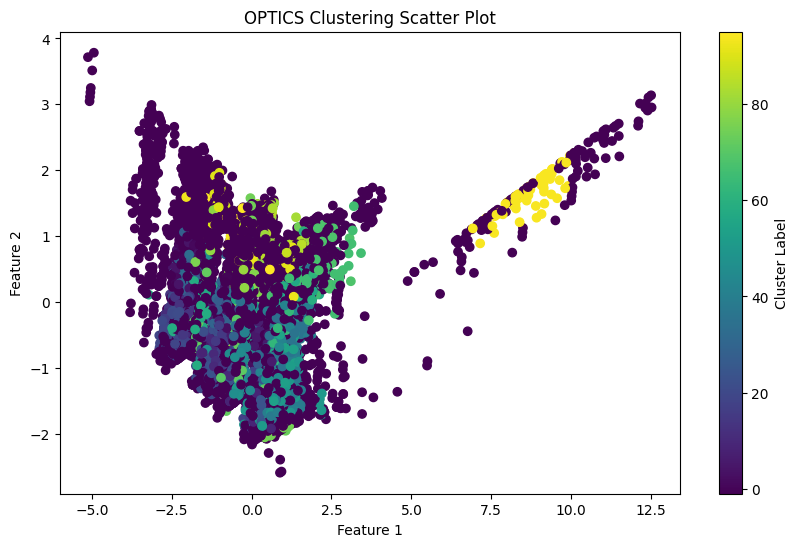

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=optics_labels )
plt.title('OPTICS Clustering Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

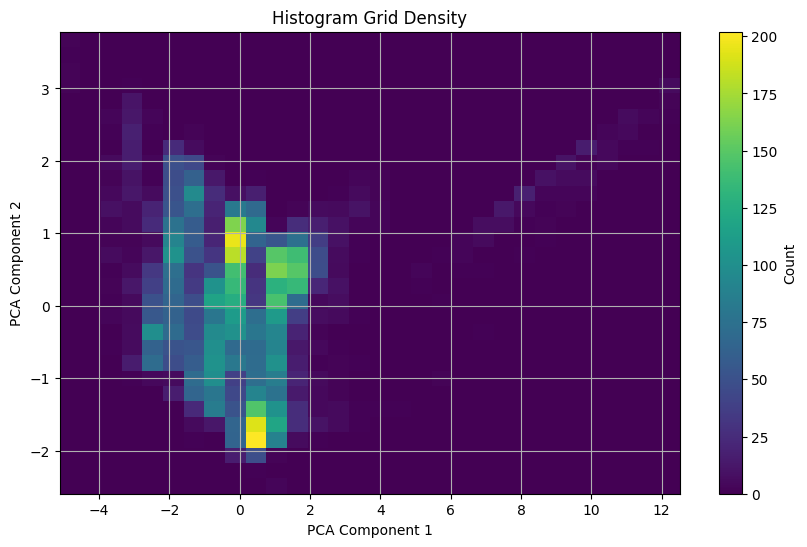

In [12]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.iloc[:,0], X.iloc[:,1], bins=30, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Histogram Grid Density')
plt.grid(True)
plt.show()


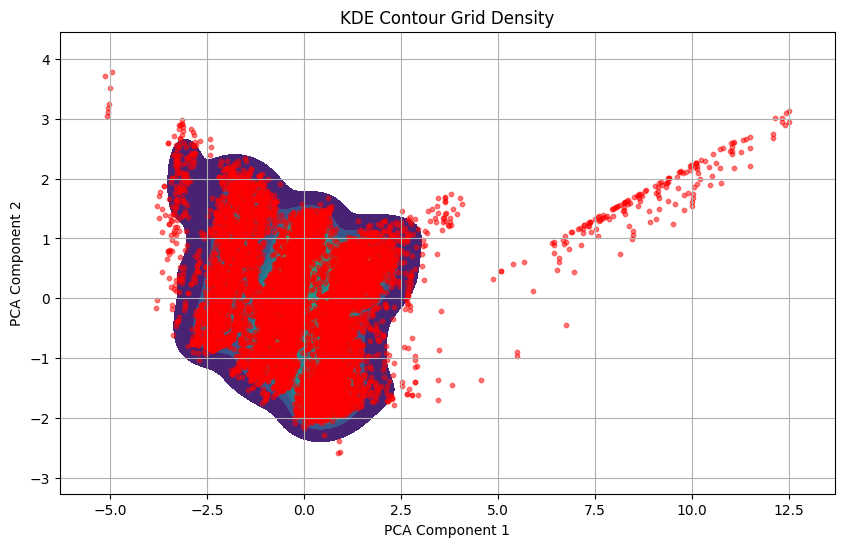

In [13]:
# KDE density
plt.figure(figsize=(10, 6))
sns.kdeplot(x=X.iloc[:,0], y=X.iloc[:,1], cmap='viridis', fill=True)
plt.scatter(X.iloc[:,0], X.iloc[:,1], color='red', s=10, alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KDE Contour Grid Density')
plt.grid(True)
plt.show()

In [14]:
# Silhouette score
silhouette = silhouette_score(X, optics_labels)
print(f'Silhouette Score: {silhouette:.4f}')

# Davies-bouldin index
db_index = davies_bouldin_score(X, optics_labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calinski-harabasz index
ch_index = calinski_harabasz_score(X, optics_labels)
print(f'Calinski-Harabasz Index: {ch_index:.4f}')


Silhouette Score: -0.1197
Davies-Bouldin Index: 1.4236
Calinski-Harabasz Index: 44.1287


OPTICS - customer.csv

In [16]:
X = prep.prep_customer
optics = OPTICS(min_samples=5, max_eps=2, metric='euclidean', cluster_method='xi', xi=0.05)
optics_labels = optics.fit_predict(X)

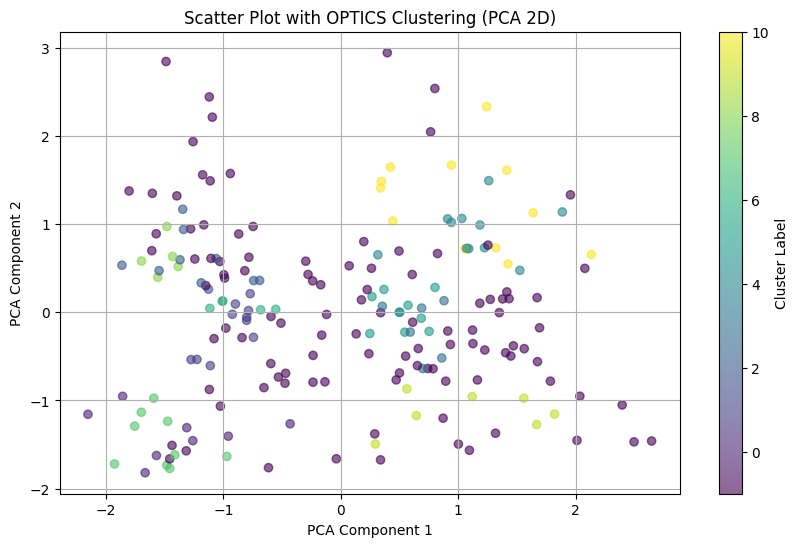

In [17]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=optics_labels, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot with OPTICS Clustering (PCA 2D)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

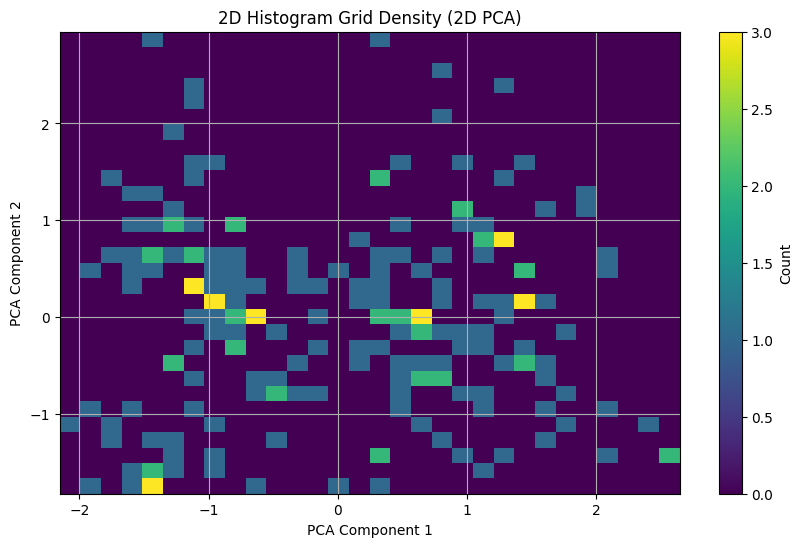

In [18]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist2d(X.iloc[:,0], X.iloc[:,1], bins=30, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Histogram Grid Density (2D PCA)')
plt.grid(True)
plt.show()

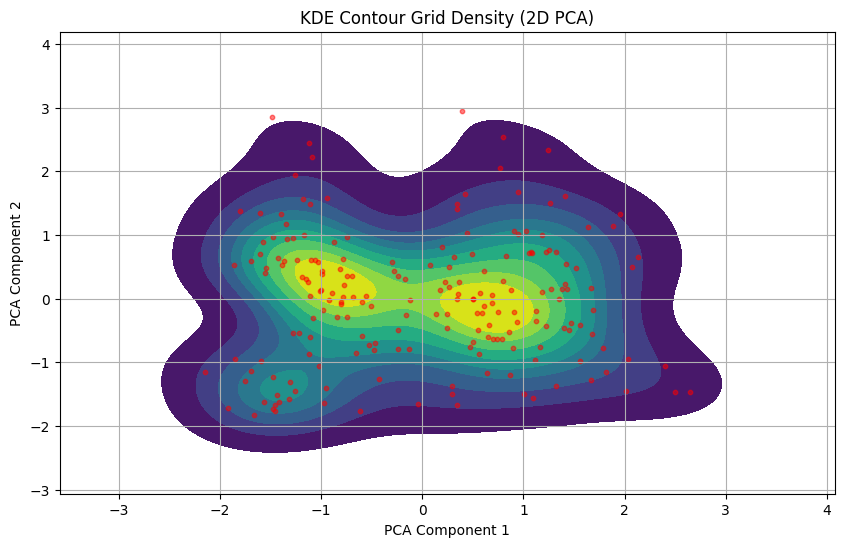

In [19]:
# KDE density 
plt.figure(figsize=(10, 6))
sns.kdeplot(x=X.iloc[:,0], y=X.iloc[:,1], cmap='viridis', fill=True)
plt.scatter(X.iloc[:,0], X.iloc[:,1], color='red', s=10, alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KDE Contour Grid Density (2D PCA)')
plt.grid(True)
plt.show()

In [20]:
# Silhouette score
silhouette = silhouette_score(X, optics_labels)
print(f'Silhouette Score (PCA 3D): {silhouette:.4f}')

# Davies-bouldin index
db_index = davies_bouldin_score(X, optics_labels)
print(f'Davies-Bouldin Index (PCA 3D): {db_index:.4f}')

# Calinski-harabasz index
ch_index = calinski_harabasz_score(X, optics_labels)
print(f'Calinski-Harabasz Index (PCA 3D): {ch_index:.4f}')

Silhouette Score (PCA 3D): -0.0399
Davies-Bouldin Index (PCA 3D): 1.5501
Calinski-Harabasz Index (PCA 3D): 11.8127
